In [1]:
!pip install pandas matplotlib seaborn psycopg2-binary

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.2 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.2 MB 840.2 kB/s eta 0:00:01
   ------------------ --------------------- 0.5/1.2 MB 840.2 kB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.2 MB 658.7 kB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.2 MB 729.5 kB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 730.9 kB/s eta 0:00:00


In [11]:
import pandas as pd
import psycopg2

# Replace these with your RDS credentials
conn = psycopg2.connect(
    host="database-churn-data.cxcskya0ebnh.eu-north-1.rds.amazonaws.com",
    port=5432,
    dbname="postgres",
    user="postgres",
    password="dataengineermairaj"  # Update your RDS password
)

# Read table from RDS
df = pd.read_sql("SELECT * FROM telco_churn_data", conn)
df.head()


C:\Users\Mairaj\AppData\Local\Temp\ipykernel_9484\1733708021.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM telco_churn_data", conn)


,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer automatic,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1. Churn Count Plot

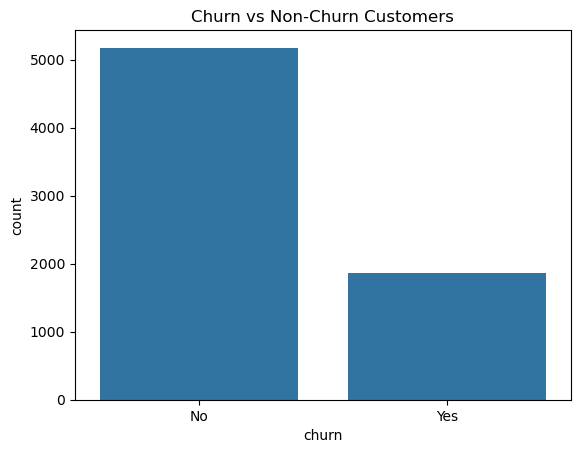

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='churn')
plt.title("Churn vs Non-Churn Customers")
plt.show()

### 2. Monthly Charges Distribution

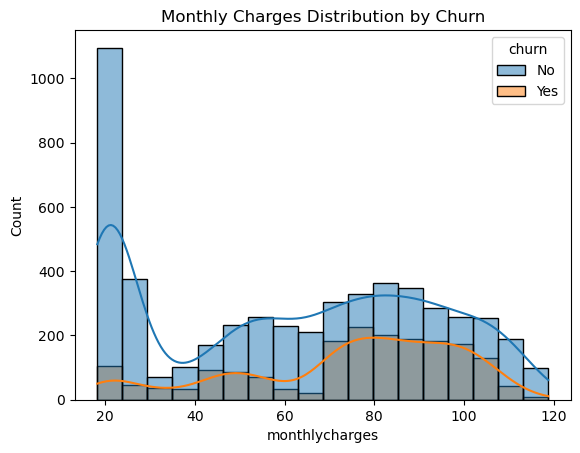

In [4]:
sns.histplot(data=df, x='monthlycharges', hue='churn', kde=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

### 3. Churn Rate by Contract Type

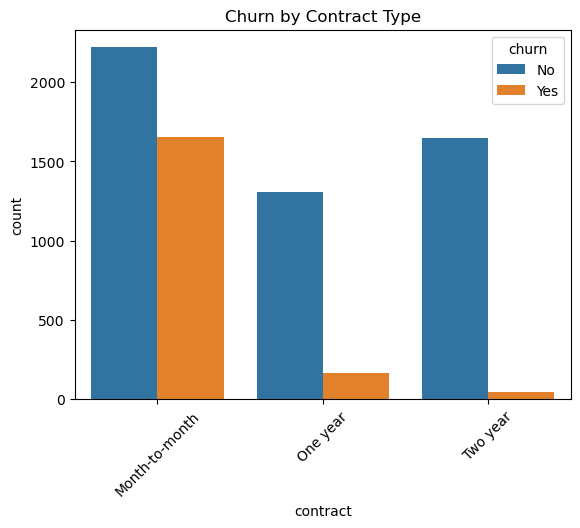

In [5]:
sns.countplot(data=df, x='contract', hue='churn')
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

### 4. Boxplot - Tenure vs Churn

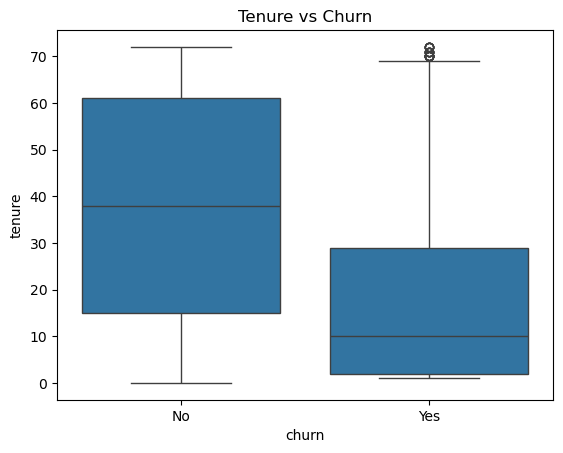

In [6]:
sns.boxplot(data=df, x='churn', y='tenure')
plt.title("Tenure vs Churn")
plt.show()

### 5.Gender vs Churn Count

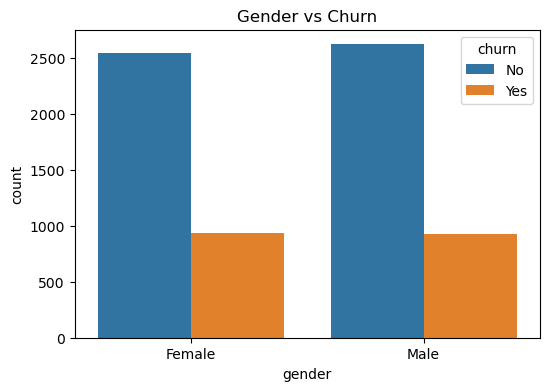

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='churn')
plt.title("Gender vs Churn")
plt.show()

### 6.Internet Service Distribution

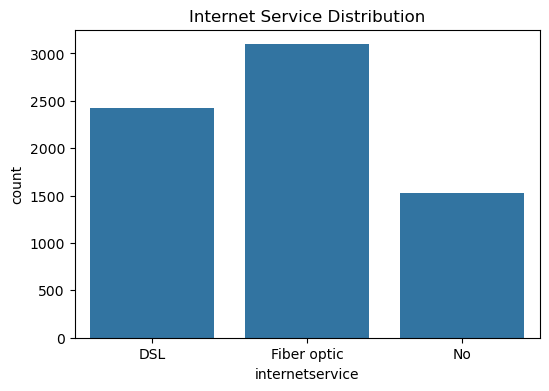

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='internetservice')
plt.title("Internet Service Distribution")
plt.show()

### 7.Correlation Heatmap (Only for Numeric Columns

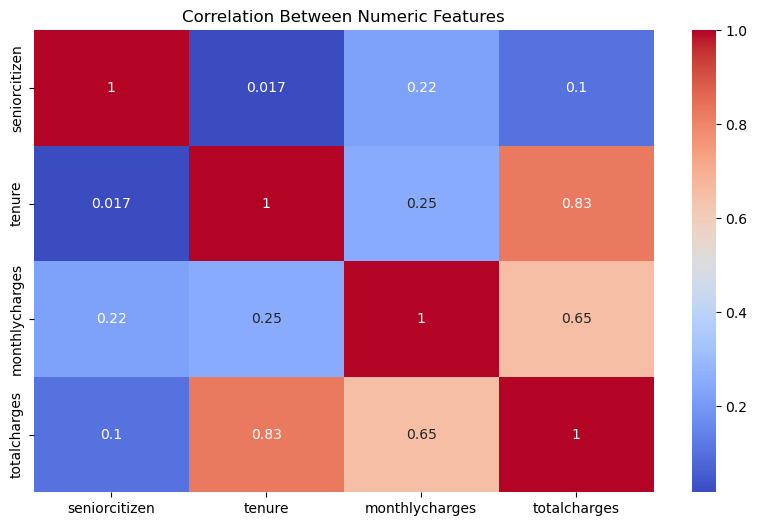

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

### 8.Senior Citizen vs Churn

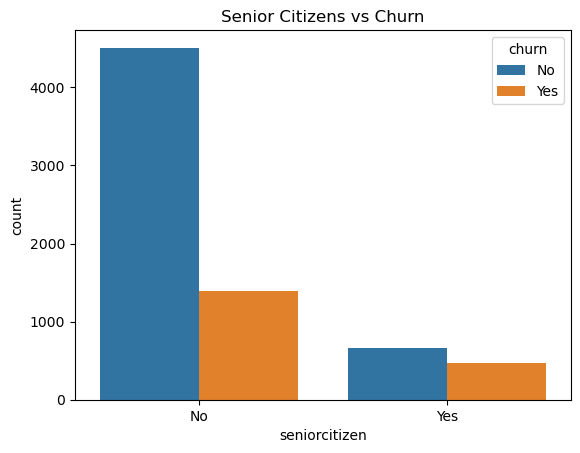

In [13]:
sns.countplot(data=df, x='seniorcitizen', hue='churn')
plt.title("Senior Citizens vs Churn")
plt.xticks([0,1], ["No", "Yes"])
plt.show()

### 9.Churn vs Contract Type

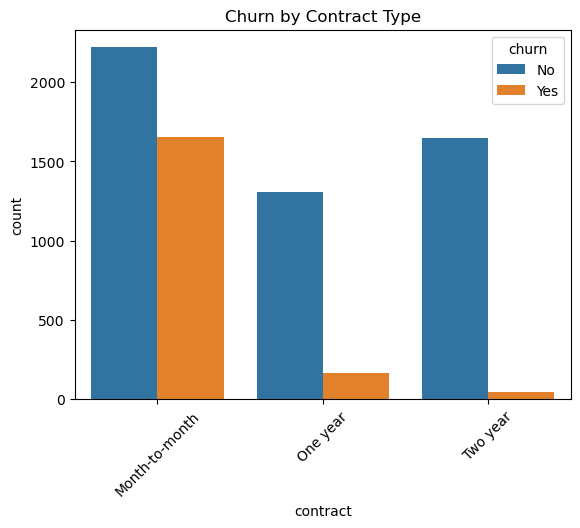

In [14]:
sns.countplot(data=df, x='contract', hue='churn')
plt.title("Churn by Contract Type")
plt.xticks(rotation=45)
plt.show()

### 10.Churn Distribution

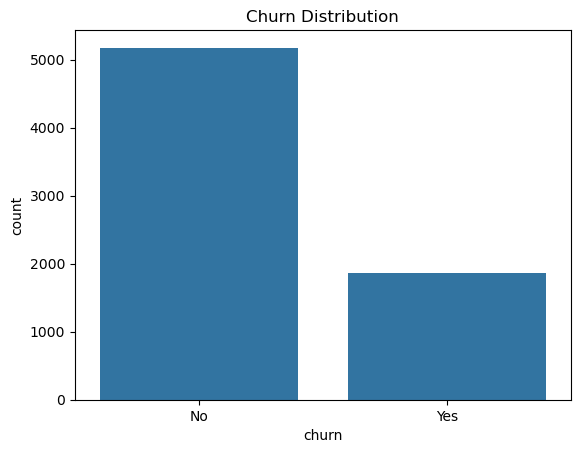

In [18]:
sns.countplot(data=df, x='churn')
plt.title("Churn Distribution")
plt.show()